In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df =pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [4]:
df["class_value"] = df["class"].map({
    "Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2
})
df

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

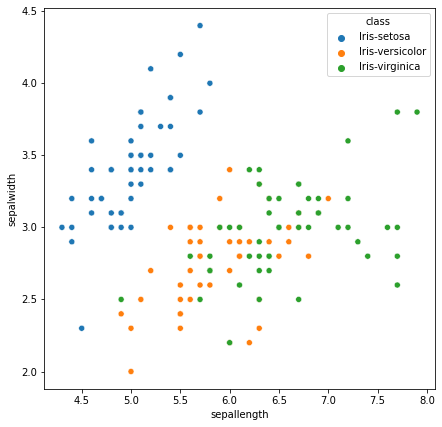

In [5]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

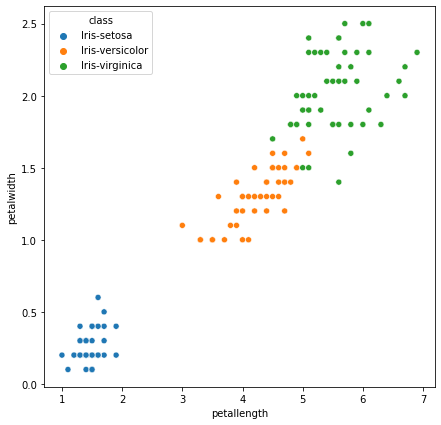

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")


In [7]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'class_value'],
      dtype='object')

<AxesSubplot:>

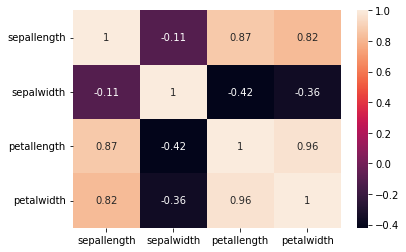

In [11]:
sns.heatmap( df.iloc[: , :4].corr() , annot=True)

In [12]:
!pip install mlxtend
!pip install dtreeplt

In [13]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [33]:
#X = df[ ["sepallength","sepalwidth"] ]
X = df[ ["petallength","petalwidth"] ]
y = df.class_value

In [34]:
model = DecisionTreeClassifier(max_depth=11)
model.fit(X, y)
model.score(X, y)

0.9933333333333333

C:\Users\kurs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

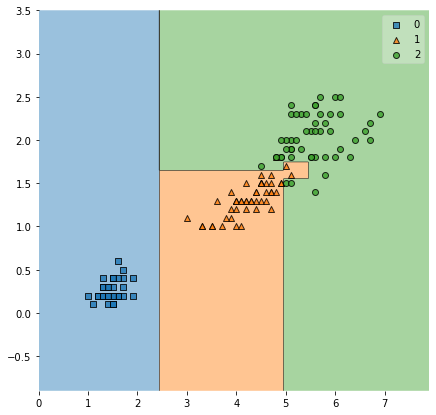

In [35]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

C:\Users\kurs\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


<Figure size 1152x864 with 0 Axes>

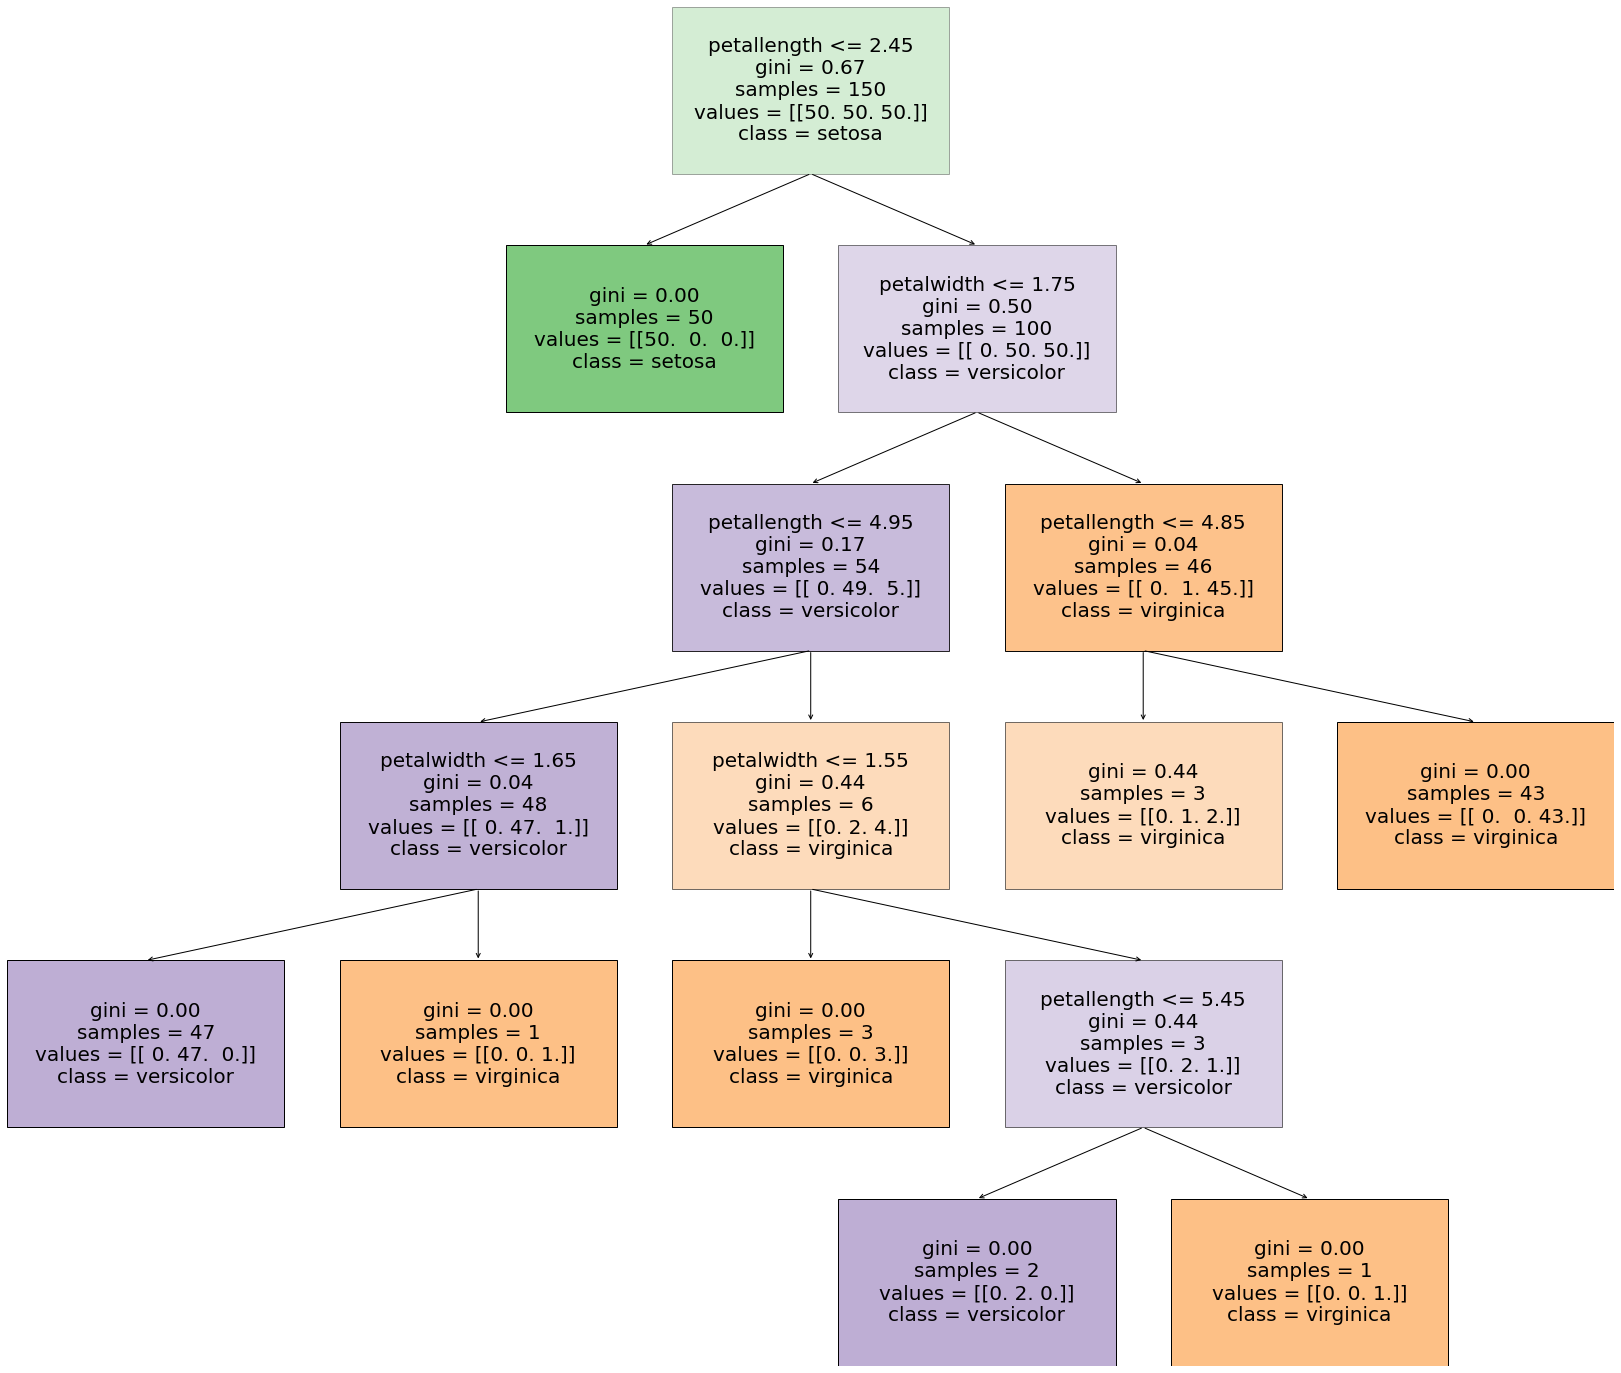

In [36]:
plt.figure(figsize=(16,12))
dtreeplt(model, feature_names=X.columns, target_names=["setosa","versicolor","virginica"]).view();
plt.savefig("dt.png", dpi=150)

In [37]:
X = df.iloc[:, :4]
y = df.class_value

model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X, y)
model.score(X, y)

1.0

In [39]:
pd.DataFrame( model.feature_importances_ , X.columns)

,0
sepallength,0.000000
sepalwidth,0.013333
petallength,0.064056
petalwidth,0.922611


C:\Users\kurs\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


<Figure size 864x576 with 0 Axes>

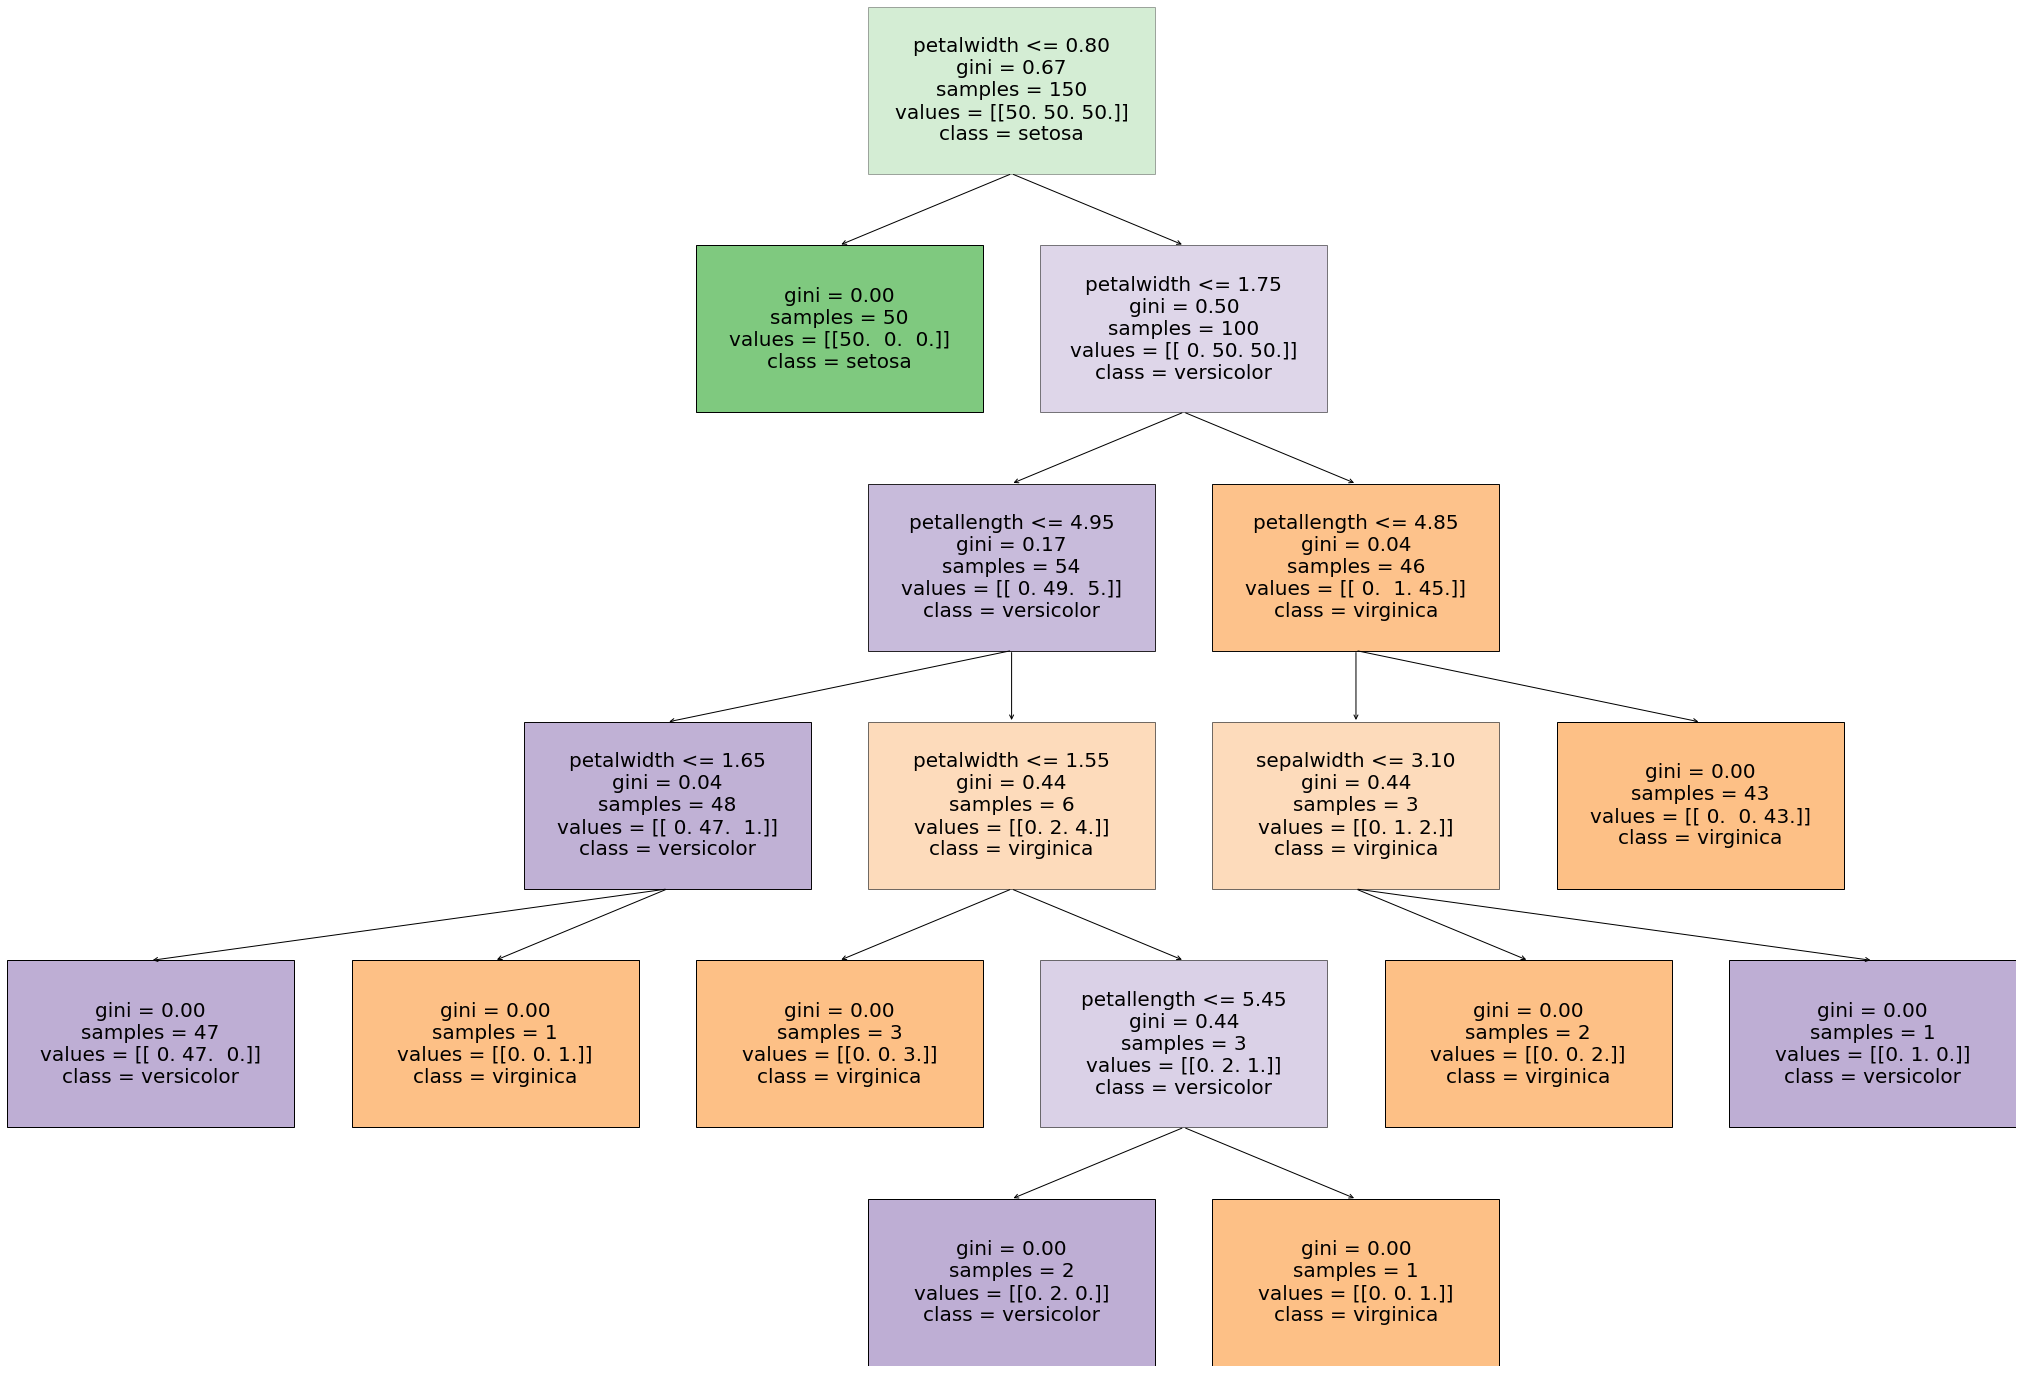

In [40]:
plt.figure(figsize=(12,8))
dtreeplt(model, feature_names=X.columns, target_names=["setosa","versicolor","virginica"]).view();